In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model_name = ["BERT Base", "WIC", "COPA", "BOOLQ"]
fine_tune_data = ["WIC", "COPA", "BOOLQ"]
# 6,10,3
fine_tune_acc = [ 0.7068965435028076,0.4099999964237213,0.7293577790260315]
downstream_acc = [0.5062, 0.501,0.4968,0.8738]

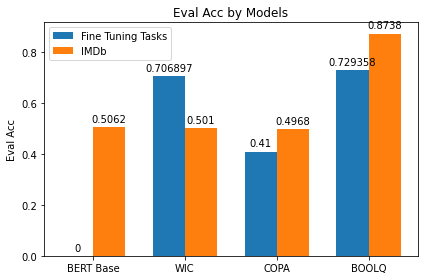

In [15]:
# !pip install matplotlib --upgrade
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_bars(labels, lst1, lst2, width=0.35):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, lst1, width, label='Fine Tuning Tasks')
    rects2 = ax.bar(x + width/2, lst2, width, label='IMDb')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Eval Acc')
    ax.set_title('Eval Acc by Models')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
labels = ["BERT Base", "WIC", "COPA", "BOOLQ"]
lst1 = [ 0, 0.7068965435028076,0.4099999964237213,0.7293577790260315]
lst2 = [0.5062, 0.501,0.4968,0.8738]
plot_grouped_bars(labels, lst1, lst2, width=0.35)

In [16]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [19]:
def plot_grouped_bars_time(labels, lst1, width=0.35):

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, lst1, width, label='Fine Tuning Tasks')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Fine Tuning time')
    ax.set_title('Fine Tuning times by Models')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)

    fig.tight_layout()

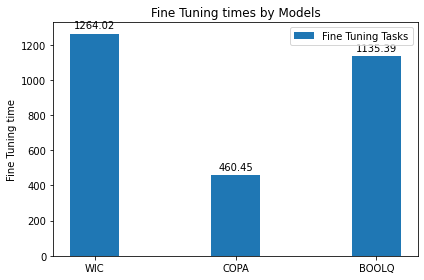

In [20]:
model_name = ["WIC", "COPA", "BOOLQ"]
fine_tune_data = ["WIC", "COPA", "BOOLQ"]
fine_tune_time = [1264.0194,460.4505,1135.3919]

plot_grouped_bars_time(model_name, fine_tune_time, width=0.35)


In [1]:
import pandas as pd

boolq_train = pd.read_csv("BoolQ/train.csv")
wic_train = pd.read_csv("WiC/train.csv")
COPA_train = pd.read_csv("COPA/train.csv")

In [2]:
boolq_complete_sentence = boolq_train["question"].values.tolist()
wic_complete_sentence = (wic_train["sentence1"]+" "+wic_train["sentence2"]).values.tolist()
copa_complete_sentence = (COPA_train["premise"]+" "+COPA_train["choice1"]+" "+COPA_train["choice2"]).values.tolist()

In [3]:
len(boolq_complete_sentence)

9427

In [4]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pt_batch_boolq = tokenizer(
    boolq_complete_sentence,
    padding=True,
    truncation=True,
    max_length = 24,
    return_tensors="pt")

pt_batch_wic = tokenizer(
    wic_complete_sentence,
    padding=True,
    truncation=True,
    max_length = 24,
    return_tensors="pt")


pt_batch_copa = tokenizer(
    copa_complete_sentence,
    padding=True,
    truncation=True,
    max_length = 24,
    return_tensors="pt")


In [ ]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch
import numpy as np
model = BertModel.from_pretrained('bert-base-uncased')
output_boolq=model(input_ids=pt_batch_boolq["input_ids"])
print("done")
output_wic=model(input_ids=pt_batch_wic["input_ids"])
print("done")
output_copa=model(input_ids=pt_batch_copa["input_ids"])



done


In [ ]:
sum_hidden_boolq = torch.mean(output_boolq.last_hidden_state, dim=0).detach().numpy()
sum_hidden_wic = torch.mean(output_wic.last_hidden_state, dim=0).detach().numpy()
sum_hidden_copa = torch.mean(output_copa.last_hidden_state, dim=0).detach().numpy()

In [ ]:
np.save("boolq.npy", sum_hidden_boolq)
np.save("wic.npy", sum_hidden_wic)
np.save("copa.npy", sum_hidden_copa)

In [7]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [8]:
URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
                                  origin=URL,
                                  untar=True,
                                  cache_dir='.',
                                  cache_subdir='')

In [9]:

# The shutil module offers a number of high-level 
# operations on files and collections of files.
import os
import shutil
# Create main directory path ("/aclImdb")
main_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
# Create sub directory path ("/aclImdb/train")
train_dir = os.path.join(main_dir, 'train')
# Remove unsup folder since this is a supervised learning task
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)
# View the final train folder
print(os.listdir(train_dir))

['urls_unsup.txt', '.DS_Store', 'neg', 'urls_pos.txt', 'urls_neg.txt', 'pos', 'unsupBow.feat', 'labeledBow.feat']


In [10]:
train = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='training', seed=123)
test = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='validation', seed=123)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [11]:
import pandas as pd
for i in train.take(1):
  train_feat = i[0].numpy()
  train_lab = i[1].numpy()

train = pd.DataFrame([train_feat, train_lab]).T
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,Canadian director Vincenzo Natali took the art...,1
1,I gave this film 10 not because it is a superb...,1
2,I admit to being somewhat jaded about the movi...,1
3,"For a long time, 'The Menagerie' was my favori...",1
4,A truly frightening film. Feels as if it were ...,0


In [12]:
imdb_sentence = train["DATA_COLUMN"].values.tolist()
from transformers import BertTokenizer, BertModel, BertForMaskedLM
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
pt_batch_imdb = tokenizer(
    imdb_sentence[:500],
    padding=True,
    truncation=True,
    max_length = 24,
    return_tensors="pt")

In [13]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch
model = BertModel.from_pretrained('bert-base-uncased')
output_imdb=model(input_ids=pt_batch_imdb["input_ids"])
sum_hidden_imdb = torch.mean(output_imdb.last_hidden_state, dim=0).detach().numpy()
np.save("imdb.npy",sum_hidden_imdb)

In [14]:
np.save("imdb.npy",sum_hidden_imdb)

In [2]:
import numpy as np
sum_hidden_imdb = np.load("imdb.npy")
sum_hidden_copa = np.load("copa.npy")
sum_hidden_wic = np.load("wic.npy")
sum_hidden_boolq = np.load("boolq.npy")

In [4]:
sum_hidden_imdb.shape

(24, 768)

## Sentence Level distance

In [16]:
dist_copa = np.linalg.norm(sum_hidden_copa-sum_hidden_imdb)
dist_wic = np.linalg.norm(sum_hidden_wic-sum_hidden_imdb)
dist_boolq = np.linalg.norm(sum_hidden_boolq-sum_hidden_imdb)

In [17]:
dist_copa

23.698523

In [18]:
dist_wic

31.357006

In [19]:
dist_boolq

56.765472

## Word Level distance

In [38]:
word_imdb = np.mean(sum_hidden_imdb, axis=0)
word_wic = np.mean(sum_hidden_wic, axis=0)
word_boolq = np.mean(sum_hidden_boolq, axis=0)
word_copa = np.mean(sum_hidden_copa, axis=0)


In [39]:
word_dist_copa = np.linalg.norm(word_copa-word_imdb)
word_dist_wic = np.linalg.norm(word_wic-word_imdb)
word_dist_boolq = np.linalg.norm(word_boolq-word_imdb)

In [40]:
word_dist_copa

3.402492

In [41]:
word_dist_wic

4.2645764

In [42]:
word_dist_boolq

8.643148

In [37]:
word_boolq

(768,)